# Data wrangling and visualization with pandas, seaborn, and matplotlib

## Lesson preamble

### Learning Objectives

- Understand the split-apply-combine concept for data analysis.
    - Use `groupby()`, `mean()`, `agg()` and `size()` to apply this technique.
- Produce scatter plots, line plots, and histograms using `seaborn` and `matplotlib`.
- Set universal plot settings.
- Understand and apply grids for faceting in `seaborn`.

### Lesson outline

- Split-apply-combine techniques in `pandas`
    - Using `mean()` to summarize categorical data (20 min)
    - Using `size()` to summarize categorical data (10 min)
- Data visualization with `matplotlib` and `seaborn` (10 min)
    - Visualizing one quantitative variable with multiple categorical variables (50 min)
    - Visualizing the relationship of two quantitative variable with multiple categorical variables (40min)
- Split-apply-combine... plot! (20 min)

In [1]:
import pandas as pd

surveys = pd.read_csv('surveys.csv')
surveys.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
34781,26966,10,25,1997,7,PL,M,20.0,16.0,Peromyscus,leucopus,Rodent,Rodent Exclosure
34782,27185,11,22,1997,7,PL,F,21.0,22.0,Peromyscus,leucopus,Rodent,Rodent Exclosure
34783,27792,5,2,1998,7,PL,F,20.0,8.0,Peromyscus,leucopus,Rodent,Rodent Exclosure
34784,28806,11,21,1998,7,PX,NaN,NaN,NaN,Chaetodipus,sp.,Rodent,Rodent Exclosure
34785,30986,7,1,2000,7,PX,NaN,NaN,NaN,Chaetodipus,sp.,Rodent,Rodent Exclosure


## Split-apply-combine techniques in pandas

Many data analysis tasks can be approached using the *split-apply-combine* paradigm: split the data into groups, apply some analysis to each group, and then combine the results.

**`pandas`** facilitates this workflow through the use of `groupby()` to split data and summary function such as `mean()`, which collapses each group into a single-row summary of that group. The arguments to `groupby()` are the column names that contain the **categorical** variables by which  summary statistics should be calculated. To start, compute the mean `weight` by sex.

In [2]:
# NA values are included by default since pandas 0.23
# could be excluded with `observed=True` or `dropna()`
surveys.groupby('genus')['weight'].mean()

genus
Ammodramus                 NaN
Ammospermophilus           NaN
Amphispiza                 NaN
Baiomys               8.600000
Calamospiza                NaN
Callipepla                 NaN
Campylorhynchus            NaN
Chaetodipus          24.179329
Cnemidophorus              NaN
Crotalus                   NaN
Dipodomys            55.860219
Lizard                     NaN
Neotoma             159.245660
Onychomys            26.496173
Perognathus           8.377454
Peromyscus           21.456262
Pipilo                     NaN
Pooecetes                  NaN
Reithrodontomys      10.667939
Rodent                     NaN
Sceloporus                 NaN
Sigmodon             67.264574
Sparrow                    NaN
Spermophilus         93.500000
Sylvilagus                 NaN
Zonotrichia                NaN
Name: weight, dtype: float64

`mean()` ignores NA values by default, so they don't need to be explicitly dropped. Groupings can also be created from multiple columns:

In [3]:
surveys.groupby(['genus', 'sex'])['weight'].mean()

genus             sex
Ammospermophilus  M             NaN
Baiomys           F        9.161290
                  M        7.357143
Chaetodipus       F       23.763824
                  M       24.712219
Dipodomys         F       55.244360
                  M       56.243034
Neotoma           F      154.282209
                  M      165.652893
Onychomys         F       26.780959
                  M       26.246466
Perognathus       F        8.574803
                  M        8.204182
Peromyscus        F       22.491649
                  M       20.644279
Reithrodontomys   F       11.220080
                  M       10.159941
Sigmodon          F       71.696000
                  M       61.336842
Spermophilus      F       57.000000
                  M      130.000000
Name: weight, dtype: float64

In [4]:
surveys.groupby(['sex', 'genus'])['weight'].size()

sex  genus           
F    Baiomys               31
     Chaetodipus         3255
     Dipodomys           7050
     Neotoma              675
     Onychomys           1536
     Perognathus          778
     Peromyscus           977
     Reithrodontomys     1260
     Sigmodon             127
     Spermophilus           1
M    Ammospermophilus       1
     Baiomys               14
     Chaetodipus         2693
     Dipodomys           8946
     Neotoma              502
     Onychomys           1673
     Perognathus          827
     Peromyscus          1218
     Reithrodontomys     1373
     Sigmodon              99
     Spermophilus           2
Name: weight, dtype: int64

Since the same filtered and grouped data frame will be used in multiple code chunks below, this of the data to a new variable and use this variable in the subsequent code chunks instead of typing out the functions each time.

In [5]:
grouped_surveys = surveys.groupby(['genus', 'sex'])
grouped_surveys['weight'].mean() # Confirm that it is the same as above

genus             sex
Ammospermophilus  M             NaN
Baiomys           F        9.161290
                  M        7.357143
Chaetodipus       F       23.763824
                  M       24.712219
Dipodomys         F       55.244360
                  M       56.243034
Neotoma           F      154.282209
                  M      165.652893
Onychomys         F       26.780959
                  M       26.246466
Perognathus       F        8.574803
                  M        8.204182
Peromyscus        F       22.491649
                  M       20.644279
Reithrodontomys   F       11.220080
                  M       10.159941
Sigmodon          F       71.696000
                  M       61.336842
Spermophilus      F       57.000000
                  M      130.000000
Name: weight, dtype: float64

Instead of using the `mean()` method, the more general `agg()` method could be called to aggregate (or summarize) by any function. The equivalent to the `mean()` method would be to call `agg()` with the numpy function `np.mean()`.

In [6]:
import numpy as np

grouped_surveys['weight'].agg(np.mean)

genus             sex
Ammospermophilus  M             NaN
Baiomys           F        9.161290
                  M        7.357143
Chaetodipus       F       23.763824
                  M       24.712219
Dipodomys         F       55.244360
                  M       56.243034
Neotoma           F      154.282209
                  M      165.652893
Onychomys         F       26.780959
                  M       26.246466
Perognathus       F        8.574803
                  M        8.204182
Peromyscus        F       22.491649
                  M       20.644279
Reithrodontomys   F       11.220080
                  M       10.159941
Sigmodon          F       71.696000
                  M       61.336842
Spermophilus      F       57.000000
                  M      130.000000
Name: weight, dtype: float64

This general method is more flexible and powerful since you can apply multiple aggregation function at once by passing them as a list to `agg()`. For instance, the standard deviation and mean could be computed in the same call.

In [7]:
# Multiple aggregation functions are passed as a list, hence the square brackets
grouped_surveys['weight'].agg ([np.mean, np.std])

mean        std
genus            sex                       
Ammospermophilus M           NaN        NaN
Baiomys          F      9.161290   2.237510
                 M      7.357143   0.841897
Chaetodipus      F     23.763824   7.973696
                 M     24.712219  10.303329
Dipodomys        F     55.244360  29.657217
                 M     56.243034  29.008498
Neotoma          F    154.282209  39.186546
                 M    165.652893  48.991563
Onychomys        F     26.780959   6.269802
                 M     26.246466   6.360828
Perognathus      F      8.574803   4.123303
                 M      8.204182   3.238490
Peromyscus       F     22.491649   4.850259
                 M     20.644279   3.935623
Reithrodontomys  F     11.220080   2.604365
                 M     10.159941   1.760459
Sigmodon         F     71.696000  28.241820
                 M     61.336842  20.418291
Spermophilus     F     57.000000        NaN
                 M    130.000000        NaN

Any function can be passed like this, including self written ones. For many common aggregation function, **`pandas`** allows to pass a string with the function name as a convenience.

In [8]:
grouped_surveys['weight'].agg (['mean', 'median', 'count'])

mean  median  count
genus            sex                           
Ammospermophilus M           NaN     NaN      0
Baiomys          F      9.161290     9.0     31
                 M      7.357143     7.0     14
Chaetodipus      F     23.763824    23.0   3201
                 M     24.712219    21.0   2627
Dipodomys        F     55.244360    45.0   6826
                 M     56.243034    47.0   8649
Neotoma          F    154.282209   160.0    652
                 M    165.652893   170.0    484
Onychomys        F     26.780959    26.0   1502
                 M     26.246466    25.0   1627
Perognathus      F      8.574803     8.0    762
                 M      8.204182     8.0    813
Peromyscus       F     22.491649    23.0    958
                 M     20.644279    21.0   1206
Reithrodontomys  F     11.220080    11.0   1245
                 M     10.159941    10.0   1363
Sigmodon         F     71.696000    70.0    125
                 M     61.336842    58.0     95
Spermophilus     F     57.000000    57.0      1
                 M    130.000000   130.0      1

In [9]:
# TODO cover `.pipe` eventually?
# TODO cover lambda?

#### Challenge

1. Use `group_by()` and `summarize()` to find the mean, min, and max hindfoot
length for each species.

2. What was the heaviest animal measured in each year? Return the columns `year`,
`genus`, `species`, and `weight`.

```{r}
## Answer 1
surveys %>%
    filter(!is.na(hindfoot_length)) %>%
    group_by(species) %>%
    summarize(
        mean_hindfoot_length = mean(hindfoot_length),
        min_hindfoot_length = min(hindfoot_length),
        max_hindfoot_length = max(hindfoot_length)
    )
## Answer 2
surveys %>%
    filter(!is.na(weight)) %>%
    group_by(year) %>%
    filter(weight == max(weight)) %>% # This is going to compare to the max weight within each group
    select(year, genus, species, weight) %>%
    arrange(year)
```

### Using `size()` to summarize categorical data 

When working with data, it is also common to want to know the number of observations present for each categorical variable. For this, **`pandas`** provides `size()`. For example, to group by 'taxa' and find the number of observations for each 'taxa':

In [10]:
surveys.groupby('taxa').size()

taxa
Bird         450
Rabbit        75
Reptile       14
Rodent     34247
dtype: int64

`size()` can also be used when grouping on multiple variables.

In [11]:
surveys.groupby(['taxa', 'sex']).size()

taxa    sex
Rodent  F      15690
        M      17348
dtype: int64

Here, `size()` is the action applied to the groups created by `group_by()` and counts the total number of records for each category.

If there are many groups, `size()` is not that useful on its own. For example, to view the five most abundant species among the observations:

In [12]:
surveys.groupby('species').size()

species
albigula            1252
audubonii             75
baileyi             2891
bilineata            303
brunneicapillus       50
chlorurus             39
clarki                 1
eremicus            1299
flavus              1597
fulvescens            75
fulviventer           43
fuscus                 5
gramineus              8
harrisi              437
hispidus             179
intermedius            9
leucogaster         1006
leucophrys             2
leucopus              36
maniculatus          899
megalotis           2609
melanocorys           13
merriami           10596
montanus               8
ochrognathus          43
ordii               3027
penicillatus        3123
savannarum             2
scutalatus             1
sp.                   86
spectabilis         2504
spilosoma            248
squamata              16
taylori               46
tereticaudus           1
tigris                 1
torridus            2249
undulatus              5
uniparens              1
viridis          

Since there are 40 rows in this output, the table needs to be ordered to display the most abundant species first. This is easy to do with the `sort_values()` method.

In [13]:
surveys.groupby('species').size().sort_values()

species
viridis                1
uniparens              1
scutalatus             1
tereticaudus           1
tigris                 1
clarki                 1
leucophrys             2
savannarum             2
undulatus              5
fuscus                 5
gramineus              8
montanus               8
intermedius            9
melanocorys           13
squamata              16
leucopus              36
chlorurus             39
ochrognathus          43
fulviventer           43
taylori               46
brunneicapillus       50
fulvescens            75
audubonii             75
sp.                   86
hispidus             179
spilosoma            248
bilineata            303
harrisi              437
maniculatus          899
leucogaster         1006
albigula            1252
eremicus            1299
flavus              1597
torridus            2249
spectabilis         2504
megalotis           2609
baileyi             2891
ordii               3027
penicillatus        3123
merriami         

That's better, but it could be helpful to display the most abundant species on top. In other words, the output should be arranged in descending order.

In [14]:
surveys.groupby('species').size().sort_values(ascending=False).head(5)

species
merriami        10596
penicillatus     3123
ordii            3027
baileyi          2891
megalotis        2609
dtype: int64

Looks good! By now, our code statement has grown quite long because we have *chained* many methods together. It can be tricky to keep track of what is going on in long method chains. To make the code more readable, it can be broken up multiple lines by adding a surrounding parenthesis.

In [15]:
(surveys
     .groupby('species')
     .size()
     .sort_values(ascending=False)
     .head(5)
)

species
merriami        10596
penicillatus     3123
ordii            3027
baileyi          2891
megalotis        2609
dtype: int64

This looks neater and makes long method chains easier to reads. There is no absolute rule for when to break code into multiple line, but always try to write code that is easy for collaborators (often a future version of yourself...) to understand.

Pandas actually has a convenience function for returning the top five results, so the values don't need to be sorted explicitly.

In [16]:
(surveys
     .groupby(['species'])
     .size()
     .nlargest() # the default is 5
)

species
merriami        10596
penicillatus     3123
ordii            3027
baileyi          2891
megalotis        2609
dtype: int64

To include more attributes about these species, add columns to `groupby()`.

In [17]:
(surveys
     .groupby(['species', 'taxa', 'genus'])
     .size()
     .nlargest()
) 

species       taxa    genus          
merriami      Rodent  Dipodomys          10596
penicillatus  Rodent  Chaetodipus         3123
ordii         Rodent  Dipodomys           3027
baileyi       Rodent  Chaetodipus         2891
megalotis     Rodent  Reithrodontomys     2609
dtype: int64

Again, the display of the output shows that it is returned as a `Series`. As mentioned previously, method `to_frame` can be used to convert the output into a data frame

In [18]:
(surveys
     .groupby(['species', 'taxa', 'genus'])
     .size()
     .nlargest()
     .to_frame()
) 

,,,0
species,taxa,genus,
merriami,Rodent,Dipodomys,10596
penicillatus,Rodent,Chaetodipus,3123
ordii,Rodent,Dipodomys,3027
baileyi,Rodent,Chaetodipus,2891
megalotis,Rodent,Reithrodontomys,2609


The reason ... Multiindices can be very powerful, but when starting out they are mostly annoying. Luckily, it is straightforward to reset the index to a numerical range and move the `groupby()` multiindex levels back as columns.

In [19]:
(surveys
     .groupby(['species', 'taxa', 'genus'])
     .size()
     .nlargest()
     .reset_index()
) 

,species,taxa,genus,0
0,merriami,Rodent,Dipodomys,10596
1,penicillatus,Rodent,Chaetodipus,3123
2,ordii,Rodent,Dipodomys,3027
3,baileyi,Rodent,Chaetodipus,2891
4,megalotis,Rodent,Reithrodontomys,2609


#### Challenge

1. How many individuals were caught in each `plot_type` surveyed?

2. You saw above how to count the number of individuals of each `sex` using a
combination of `group_by()` and `tally()`. How could you get the same result
using `group_by()` and `summarize()`? Hint: see `?n`.


```{r}
## Answer 1
surveys %>%
    group_by(plot_type) %>%
    tally

## Answer 2
surveys %>%
  group_by(sex) %>%
  summarize(n = n())
```

# Data visualization in `matplotlib` and `seaborn`

There are many plotting packages in Python, making it possible to create diverse visualizations such as interactive web graphics, 3D animations, statistical visualization, and map-based plots. Here, we will focus on two of the most useful for researchers, `matplotlib` which is a robust, detail oriented, low level plotting interface, and `seaborn` which provides high level functions on top of `matplotlib` and allows the plotting calls to be expressed more in terms what is being explored in the underlying data rather than what graphical elements to add to the plot.

For example, instead of telling instructing the computer to "go through this data frame and plot any observations of speciesX in blue, any observations of speciesY in red, etc", the `seaborn` syntax allows commands more similar to "color my data by species". Thanks to this functional way of interfaces with data, only minimal changes are required if the underlying data change or to change the type of plot. This helps in thinking about the data and creating publication quality plots with minimal amounts of adjustments and tweaking.

`seaborn` plotting was introduced briefly in the first lecture and is very intuitive. To make a plot of the number of observations for each species, first import the library and then use the `countplot()` function.

In [20]:
import seaborn as sns

sns.countplot(y='species', data=surveys)

That's a lot of species... for convenience when introducing the following of the plotting concept, the number of species will be limited to the four most abundant. First, extract the names of the species of interest.

In [21]:
# TODO make sure the  multiline statement is consistent with above
most_common_species = (
    surveys['species']
       .value_counts()
       .nlargest(4)
       .index
)
most_common_species

Index(['merriami', 'penicillatus', 'ordii', 'baileyi'], dtype='object')

A subset can now be created from the data frame, including only those rows where the column 'species' matches any of the names in the `most_common_species` variable. As before, boolean indexes will be used for this. One way of doing this would be to use the `|` operator four times.

In [22]:
surveys.loc[(surveys['species'] == most_common_species[0]) |
            (surveys['species'] == most_common_species[1]) |
            (surveys['species'] == most_common_species[2]) |
            (surveys['species'] == most_common_species[3])].shape

(19637, 13)

That is quite tedious and `pandas` has a special `isin()` method for comparing a data frame column to an array-like object of names such as the index extracted above.

In [23]:
surveys.loc[surveys['species'].isin(most_common_species)].shape

(19637, 13)

Drop any NAs and assign this to a variable

In [24]:
surveys_common = surveys.loc[surveys['species'].isin(most_common_species)].dropna()
surveys_common.shape

(18289, 13)

This abbreviated data frame can now be used for plotting.

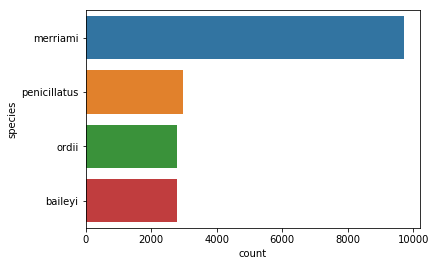

In [25]:
sns.countplot(y='species', data=surveys_common)

That's more manageable! The text is a little small, change this with the `set()` function by setting the fontscale argument to above `1.0`. The context argument changes the size of object in the plots, such as the linewidths, and will be left as the default `notebook` for now. Think of this as changing a value in the options menu of a graphical software. This option change will apply to all plots made from now on.

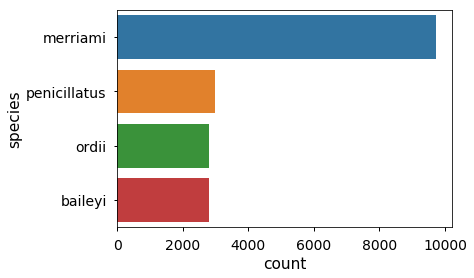

In [26]:
sns.set_context('notebook', font_scale=1.4)
sns.countplot(y='species', data=surveys_common)

To get a vertical plot, change `y` to `x`. With long label names, horizontal plots can be easier to read.

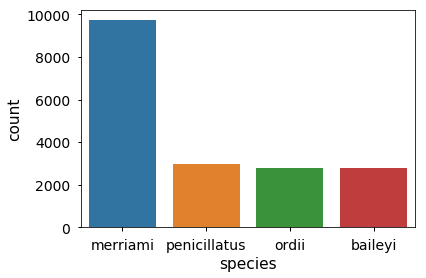

In [27]:
sns.countplot(x='species', data=surveys_common)

## Visualizing a single quantitative variable with multiple categorical variables

`seaborn` can do much more advanced visualizations than counting things. For example, to visualize summary statistics of the weight variable distribution for these fours species, a boxplot can be used.

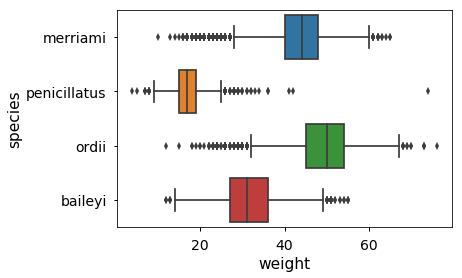

In [28]:
sns.boxplot(x='weight', y='species', data=surveys_common)

The width of each box can be changed to make it look more appealing.

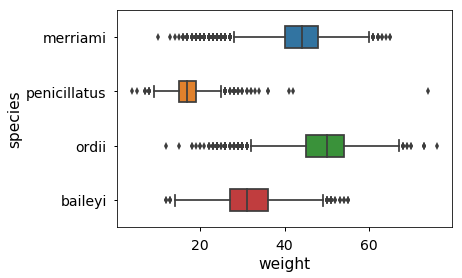

In [29]:
sns.boxplot(x='weight', y='species', data=surveys_common, width=0.4)

The syntax is very similar to that of `countplot()`, but instead of just supplying one variable and asking `seaborn` to count the observations of that variable, the xy-variables are the categorical groups (the species) and the measurement of interest (the weight).

The aim of a box plot is to display statistics of the underlying distribution, which facilitate comparison of more than just the mean + standard deviation (or another single measure of central tendency and variation) across categorical variables. These specific box plots are so-called Tukey box plots by default, which means that the graphical elements correspond to the following statistics:

- The lines of the box represent the 25th, 50th (median), and 75th quantile in the data. These divide the data into four quartiles (0-25, 25-50, 50-75, 75-100).
- The whiskers represent 1.5 * the interquartile range (the distance between the 25th and 75th quantile)
- The flyers mark all individual observations that are outside the whiskers, which could be referred to as "outliers" (there are many definitions of what could constitute an outlier).

Most of these plot elements are configurable in case and could be set to represent different distribution statistics.

Another useful visualization for comparing distributions is the `violinplot`. Again, the syntax is the same as before, just change the plot name.

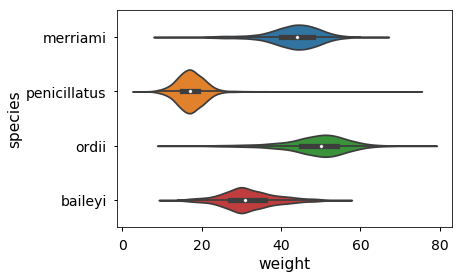

In [30]:
sns.violinplot (x='weight', y='species', data=surveys_common)

Think of this plot as a smoothened version of the underlying histogram, that is then mirrored underneath. Where the violin is wider, there are more observations. The inner part is a boxplot with the median marked as a white dot. Comparisons with histograms and other distribution visualizations will be talked more about later in the workshop, but it is good to already keep in mind that it can be misleading to use a smoothened distribution if you have few observations, and it is probably better to show the individual data points instead of, or in addition to, the distribution plot.

The colors of the violin can be muted bring out the box.

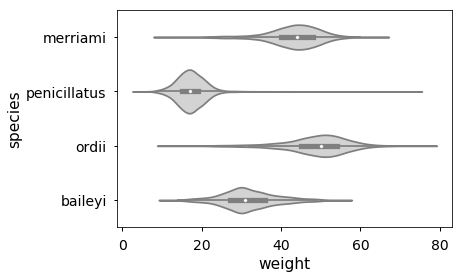

In [31]:
sns.violinplot (x='weight', y='species', data=surveys_common, color='lightgrey')

An example for when a violin plot can be more informative than a box plot is to detect multimodal distributions, which could indicate an underlying confounding variable that has been grouped together. This can be seen when plotting the 'genus' on the y-axis instead of the 'species'.

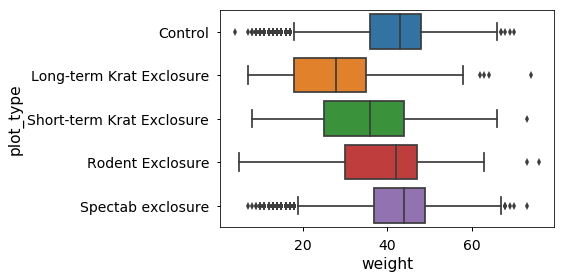

In [32]:
sns.boxplot(x='weight', y='plot_type', data=surveys_common)

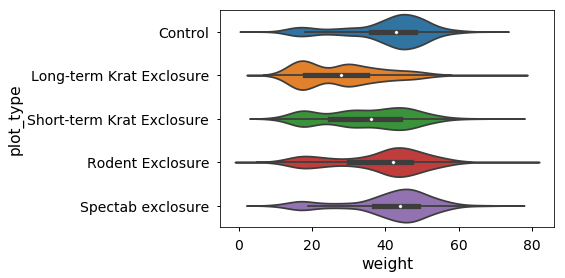

In [33]:
sns.violinplot(x='weight', y='plot_type', data=surveys_common)

From the violin plot, it appears that there could be multiple distributions grouped together within each plot type (remember that the 'plot_type' indicates the type of trap used to catch the animals). There seems to be one distribution centered around weight=20 for all traps and one distribution centered around 45 (or 30 for Long-term krat exclosure). These observations could indeed be from the same distribution, but often when there are see multiple bumps like this, it is a good idea to explore other variables in the data set, and see if we can find the reason for the multiple bumps in the violin plot.

Since there appears to be 2-3 bumps in the distributions, it would be good to find a categorical variable in the data frame that has around the same number of unique values, since grouping based on these values could explain what we are seeing. The pandas method `nunique()` comes in handy for this task.

In [34]:
surveys_common.nunique().sort_values()

taxa                   1
sex                    2
genus                  2
species_id             4
species                4
plot_type              5
month                 12
plot_id               24
year                  26
day                   31
hindfoot_length       40
weight                69
record_id          18289
dtype: int64

There are a few candidate variables that have a suitable number of unique values. A very effective approach for exploring multiple variables in a data set, is to plot so-called small multiples of the data where the same type of plot is used for different subsets of the data. These plots are drawn in rows and columns forming a grid pattern, and can be referred to as a "lattice", "facet", or "trellis" plot.

Visualizing categorical variables in this manner is a key step in exploratory data analysis, and thus `seaborn` has a dedicated plot function for this, called `factorplot()` (categorical variables are sometimes referred to as "factors"). This plot can be used to plot the same violin plot as before, and easily spread the variables across the rows and columns, e.g. for the variable "sex".

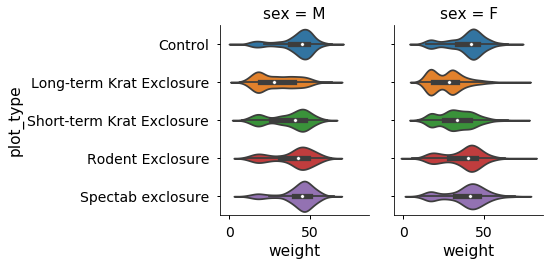

In [35]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='sex',
               kind='violin')

Sorting by the sex of the animal is probably not the most clever approach here since, the same sex from different species or genus would have different weights. Let's try adding "genus".

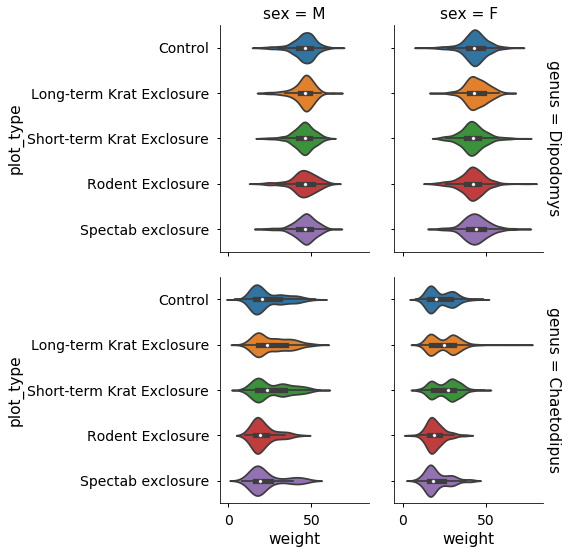

In [36]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='sex',
               row='genus', kind='violin', margin_titles=True)

There are certainly differences between the two genus, but it appears that the data still is not split into unimodal distributions. A likely explanation could be that we still have multiple species per genus and the weight is species-dependent. Let's check how many species there are per genus and how many observations there are in each.

In [37]:
surveys_common.groupby(['genus', 'species']).size()

genus        species     
Chaetodipus  baileyi         2803
             penicillatus    2969
Dipodomys    merriami        9727
             ordii           2790
dtype: int64

If the mean weights for those species are different, it could indeed explain the additional bump in the Chaetodipus genus.

In [38]:
surveys_common.groupby(['genus', 'species'])['weight'].mean()

genus        species     
Chaetodipus  baileyi         31.739922
             penicillatus    17.187942
Dipodomys    merriami        43.136013
             ordii           48.867384
Name: weight, dtype: float64

A factor plot with the column variable set to "species" instead of "genus" might be able to separate the distributions.

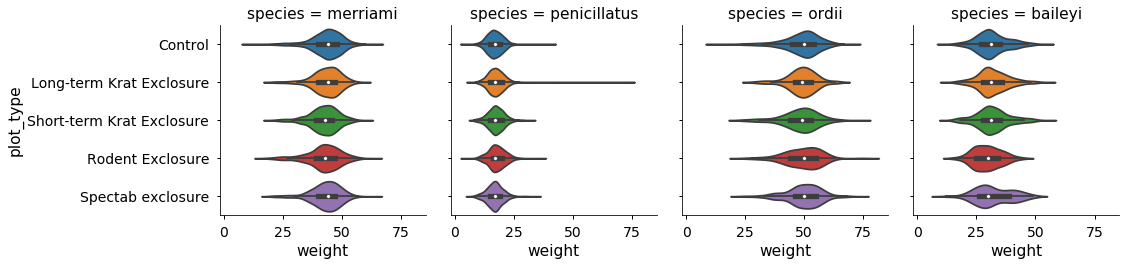

In [39]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='species',
               kind='violin')

That looks pretty good! The plot can be made more appealing by having two columns per row and making each plot a bit wider.

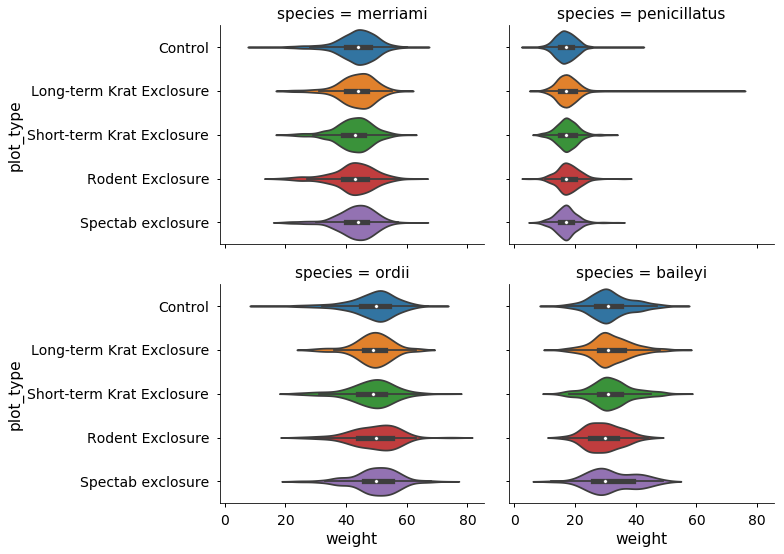

In [40]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='species', 
               col_wrap=2, kind='violin', aspect=1.4)

In [41]:
# TODO talk about violin bandwith and histogram bin number in the advanced plotting lecture

This is great, much of the variation in the weight data can be explained by the species observed. The only species where there still appears to be multimodal distributions (and thus *possibly* a confounding variable, is within "baileyi" (and potentially "ordii"), especially for the "Spectab exclosure". The "sex" variable was used in a previous plot, but it was never explored within tin each species. It is common with sexual dimorphism within a species, and this could include weight differences.

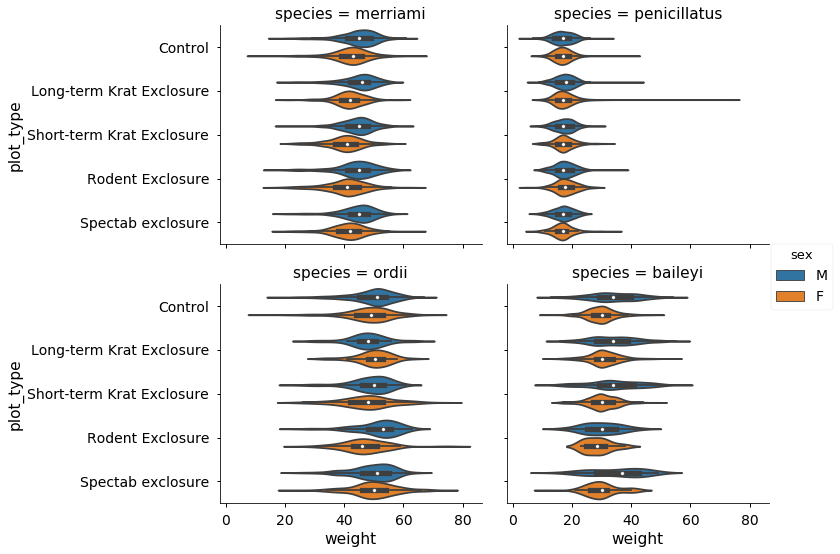

In [42]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common,
               col='species', col_wrap=2, kind='violin', aspect=1.4) 

It does indeed appear that there is a difference in mean and distribution between the sexes within the species "baileyi". Minor differences between the sexes within other species are also visible now although they were not big enough to show up in the initial violinplot (in later lectures, we will see more how the violin plot can hide differences like this). As a final beautification of this plot, the violins can be split down the middle to reduce clutter in the plot.

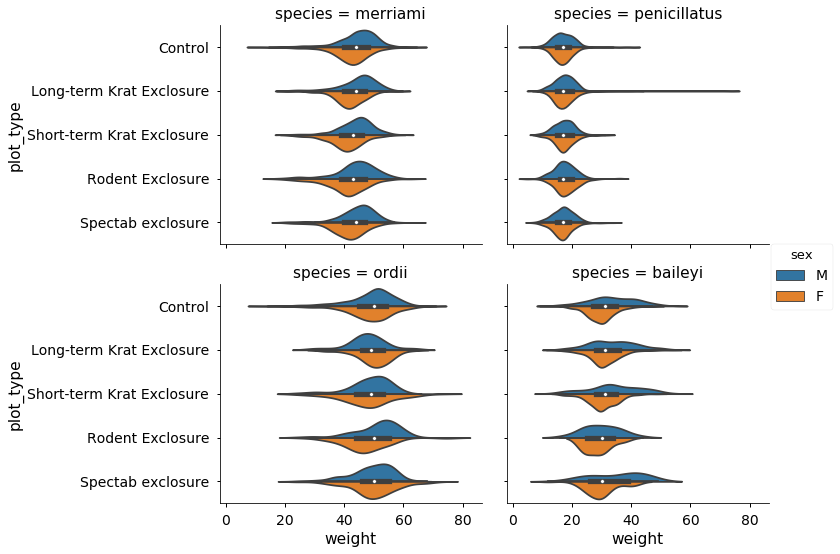

In [43]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common, 
               col='species', col_wrap=2, kind='violin', aspect=1.4, split=True)

This clearly delivers the message and looks is easy to understand. A great aspect of the `facetplot()` function, is that if there is a change of minds (or hearts) in what type of visualization to use, only minor modifications are needed to completely change the plot appearance.

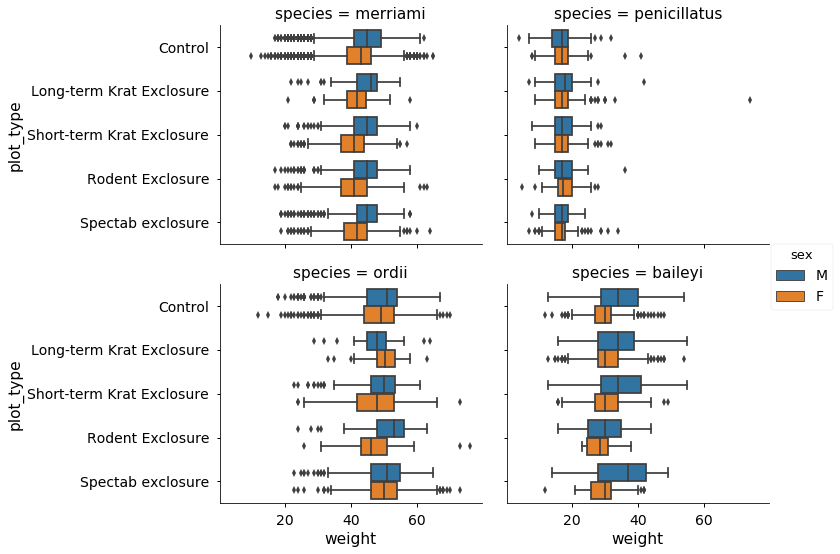

In [44]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common, 
               col='species', col_wrap=2, kind='box', aspect=1.4)

Plotting the mean and 95% CI, requires changing a couple additional parameters to make the plot look good, but the code is largely identical.

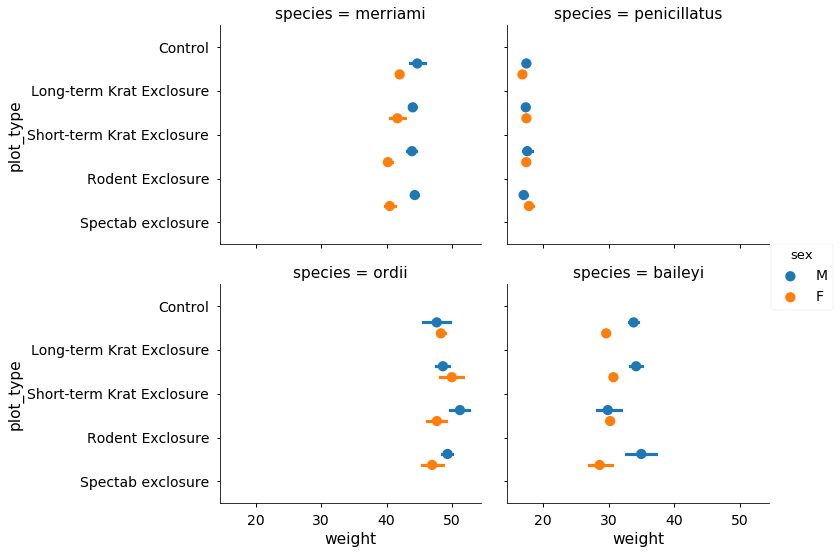

In [45]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common, 
               col='species', col_wrap=2, kind='point', aspect=1.4, join=False,
               dodge=1.25)

To recap, `facetplot()` facilitates the representation of variables within data as different elements in the plot, such as the rows, column, x-axis positions, and colors. There is a great description on this in the `seaborn` documentation:

> It is important to choose how variables get mapped to the plot structure such that the most important comparisons are easiest to make. As a general rule, it is easier to compare positions that are closer together, so the ``hue`` variable should be used for the most important comparisons. For secondary comparisons, try to share the quantitative axis (so, use ``col`` for vertical plots and ``row`` for horizontal plots). Note that, although it is possible to make rather complex plots using this function, in many cases you may be better served by created several smaller and more focused plots than by trying to stuff many comparisons into one figure

That last point is worth illustrating. It is easy to get carried away with `facetplot()` and try to visualize everything at once 

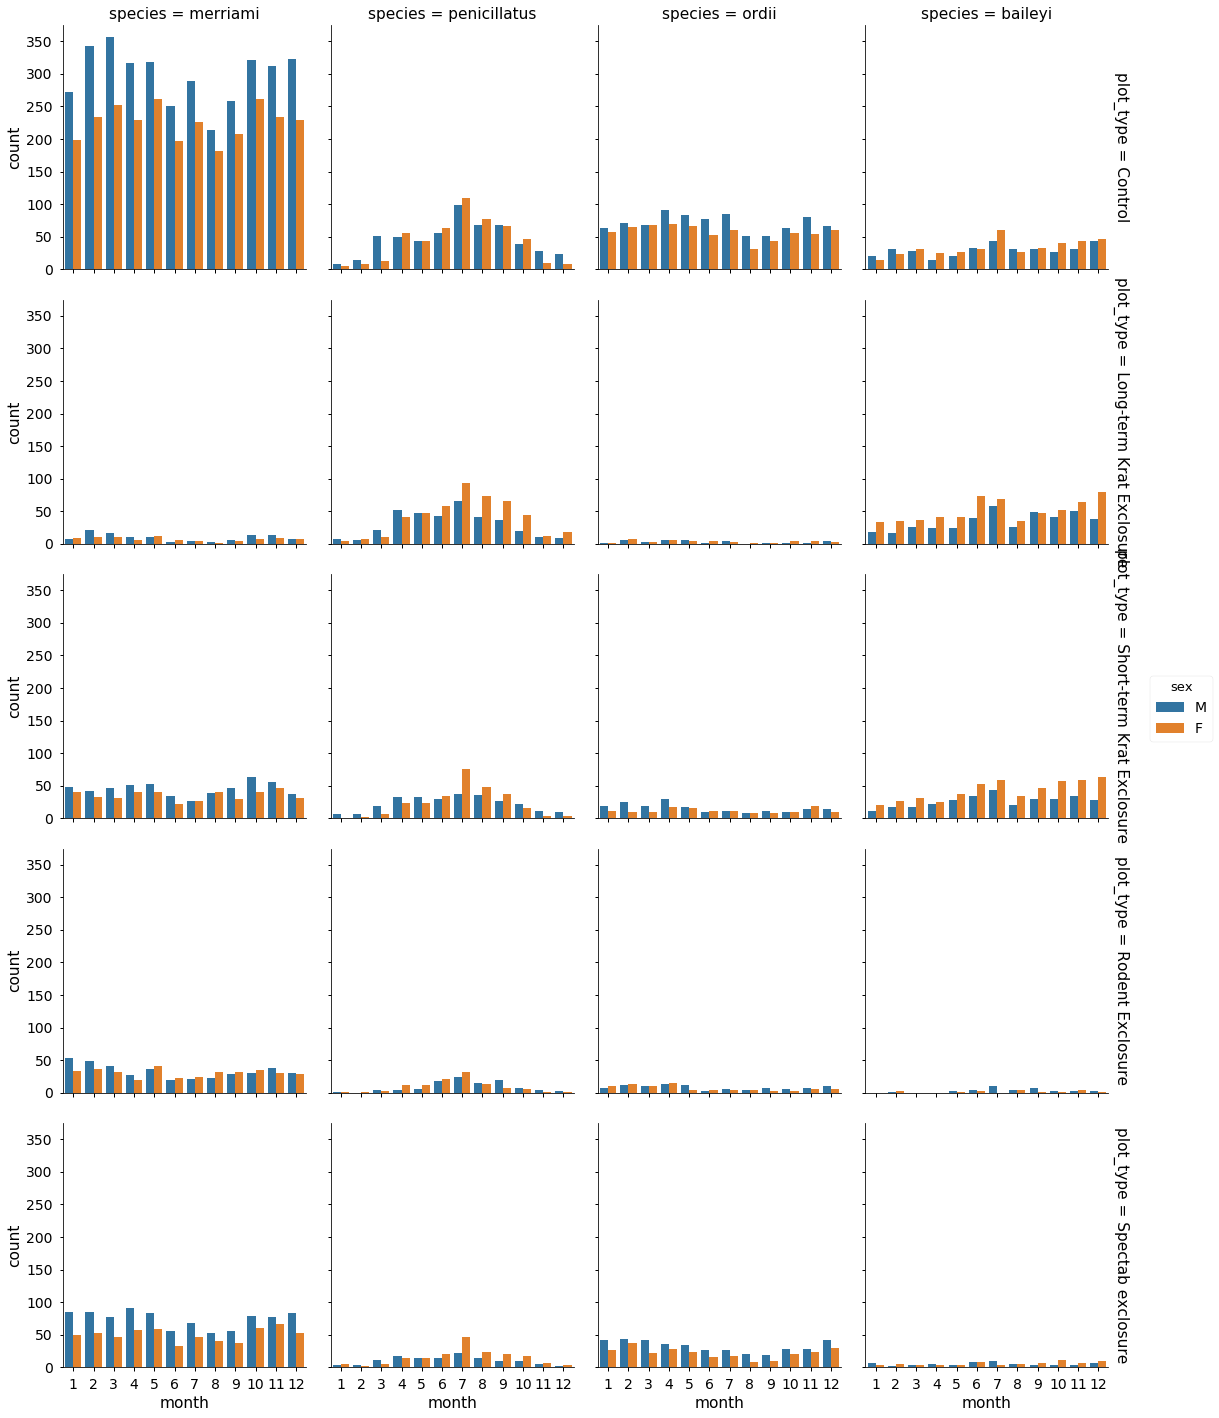

In [46]:
sns.factorplot(x='month', hue='sex', data=surveys_common, col='species',
               row='plot_type', kind='count', margin_titles=True) 

This can be overwhelming and it often a good idea to break things down into smaller chunks. Especially when presenting the data to others, the most effective communication is usually to break the messaged down into focused topics.

## Visualizing the relationship of two quantitative variable across multiple categorical variables

First, examine the variable and their. For this, the entire "surveys" dataframe can be used.

In [47]:
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34786 entries, 0 to 34785
Data columns (total 13 columns):
record_id          34786 non-null int64
month              34786 non-null int64
day                34786 non-null int64
year               34786 non-null int64
plot_id            34786 non-null int64
species_id         34786 non-null object
sex                33038 non-null object
hindfoot_length    31438 non-null float64
weight             32283 non-null float64
genus              34786 non-null object
species            34786 non-null object
taxa               34786 non-null object
plot_type          34786 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 3.5+ MB


From this it is already clear that the only two quantitative variables are "weight" and "hindfoot_length". Although some of the others are integers, they are all categorical, such as month, day and year.

A scatter plot is the immediate choice for exploring pairwise relationships between variables. `seaborn` has a convenient scatter matrix function, `pairplot()`, for plotting the pairwise relationships between all numerical variables in the data frame.

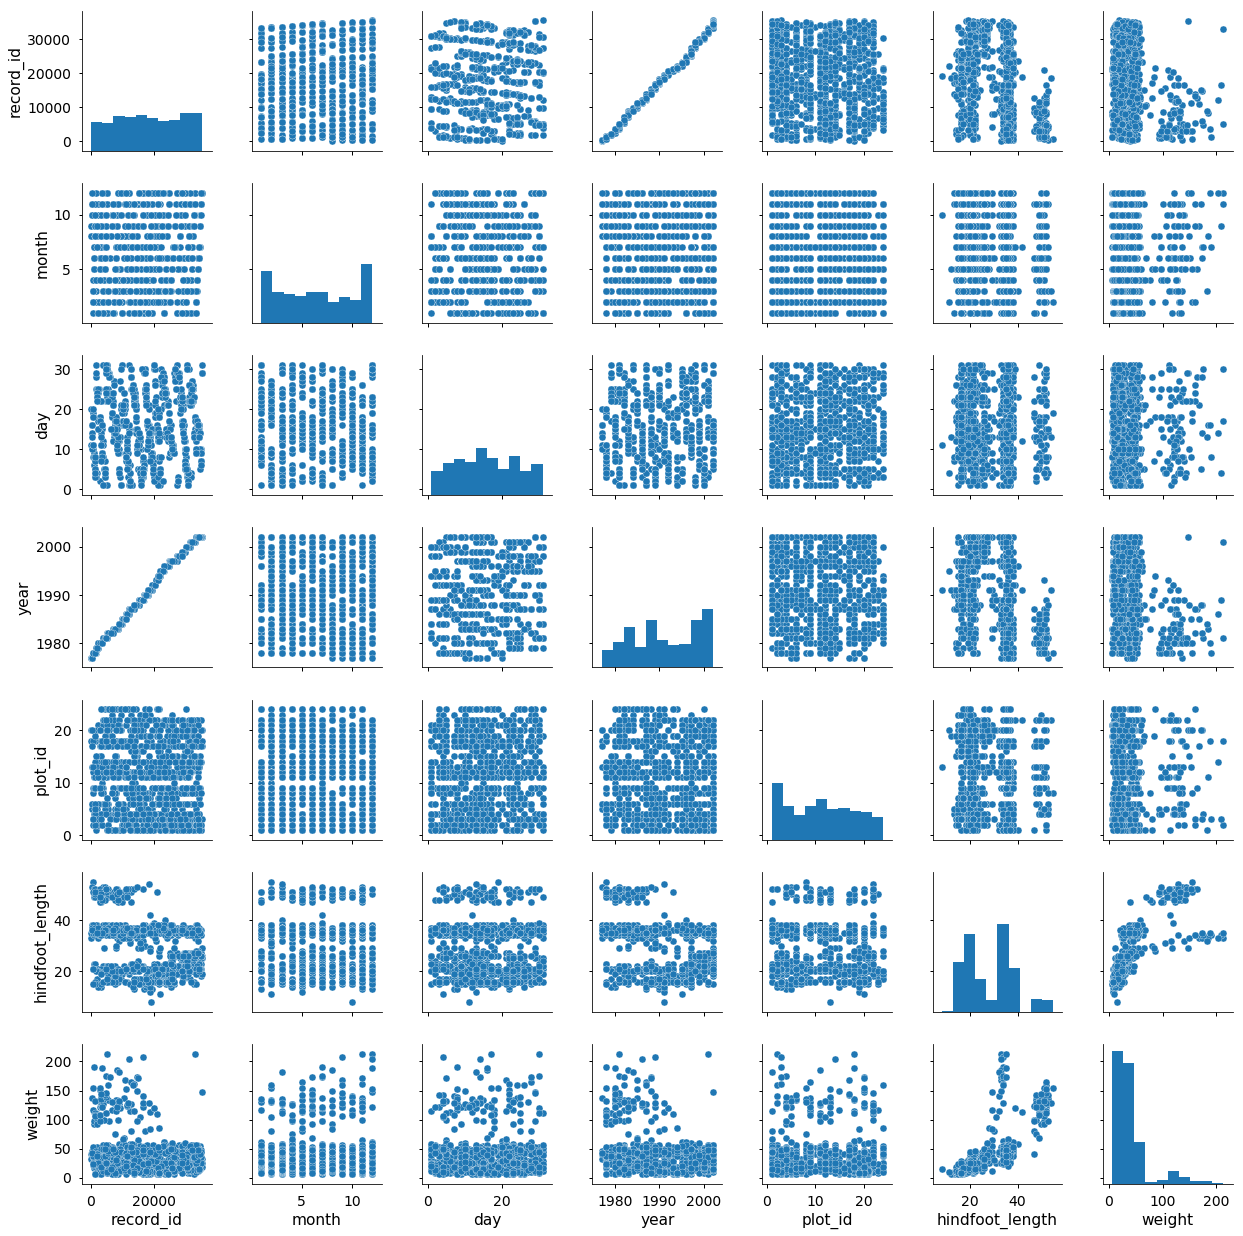

In [48]:
# TODO Call it continuous instead of quantititve?
# TODO Include this or Tie back to it in the next lecture?
# This is a pretty good way to select
# Explain sample
sns.pairplot(surveys.dropna().sample(1000))

At first glance, the relationship between `record_id` and `year` looks interesting, but it is likely only due to incrementing the `record_id` over time. Since most variables here are really categorical, it would make sense to explore them with the same `factorplot()` as in the previous section. Here, let's focus on the relationship between `weight` and `hindfoot_height`, which looks interesting.

The ... function to `factorplot()` for two quantitative variables is called `lmplot()` (linear model plot).

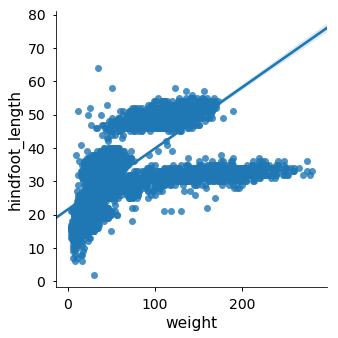

In [49]:
sns.lmplot(x='weight', y='hindfoot_length', data=surveys)

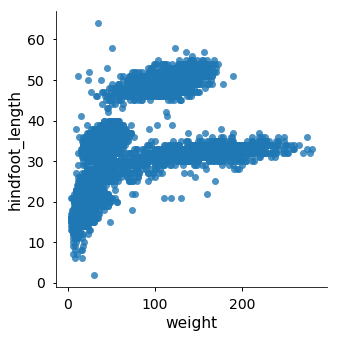

In [50]:
sns.lmplot(x='weight', y='hindfoot_length', data=surveys, fit_reg=False)

By default, it creates a scatter plot between the two variables and fits a regression line. The regression line can be removed for now.

That looks better, but it looks like the graph is quite oversaturated, compare the number of distinct observations that are visible in the plot with the number in the data frame.

In [51]:
surveys.shape

(34786, 13)

There is no where near that many observations visible in the plot, which means many data points are plotted on top of each other obfuscating what is beneath them. This problem can be ameliorated somewhat by adding transparency (`alpha`) and reducing the size of each point in the graph.

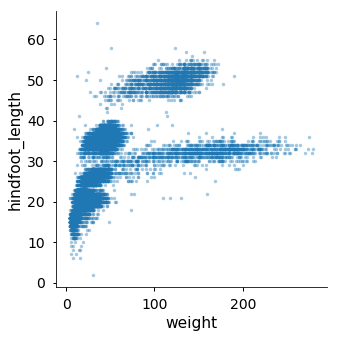

In [52]:
sns.lmplot(x='weight', y='hindfoot_length', data=surveys, fit_reg=False, 
          scatter_kws={'s': 12, 'alpha':0.4})

The scatter plot argument are passed as a dictionary here, instead of directly to parameters in the `lmplot()` function. This is a design decision taken in `seaborn` and helps for example to ensure there are no collisions among parameters (the scatter plot function that `seaborn` uses is from matplotlib and takes a lot of arguments, some of which would be inseparable from those for the regression line)

Based on the hindfoot lengths and the weights, there appears to be 4-5 clusters in this data. Potentially, one of the categorical variables in the data could explain this pattern, as previously. Coloring the data points according to a categorical variable is an easy way to find out if there seems to be correlation. Let's try this with `plot_type`.

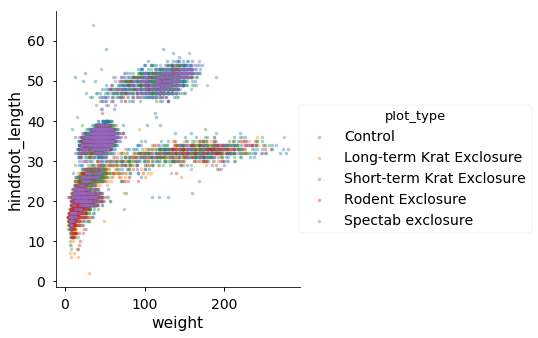

In [53]:
sns.lmplot(x='weight', y='hindfoot_length', hue='plot_type', data=surveys,
          fit_reg=False, scatter_kws={'s': 12, 'alpha':0.4})

It seems like the type of plot the animal was captured on correlates well with
some of these clusters, but there are still many that are quite mixed. Let's try
to do better! This time, the information about the data can provide some clues
to which variable to look at. The plot above suggests that there might be 4-5
clusters, so a variable with 4-5 values is a good guess for what could explain
the observed pattern in the scatter plot.

In [54]:
surveys.nunique()

record_id          34786
month                 12
day                   31
year                  26
plot_id               24
species_id            48
sex                    2
hindfoot_length       56
weight               255
genus                 26
species               40
taxa                   4
plot_type              5
dtype: int64

There are four taxa so that could be a good candidate, let's see which those are.

In [55]:
surveys['taxa'].unique()

array(['Rodent', 'Rabbit', 'Bird', 'Reptile'], dtype=object)

It seems reasonable that these taxa contain animals different enough to have
diverse weights and length of their feet. Lets use this categorical variable to
color the scatter plot.

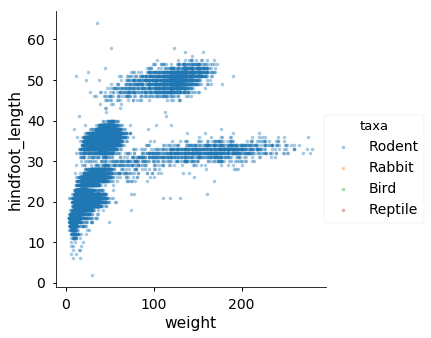

In [56]:
sns.lmplot(x='weight', y='hindfoot_length', hue='taxa', data=surveys,
          fit_reg=False, scatter_kws={'s': 12, 'alpha':0.4})

Only rodents? That was unexpected... Let's check what's going on.

In [57]:
surveys.groupby('taxa').size()

taxa
Bird         450
Rabbit        75
Reptile       14
Rodent     34247
dtype: int64

There is definitely mostly rodents in our data set...

In [58]:
surveys.dropna(subset=['hindfoot_length']).groupby('taxa').size()

taxa
Rodent    31438
dtype: int64

...and it turns out that only rodents, have had their hindfeet measured!

Let's remove all animals that did not have their hindfeet measured, including
those rodents that did not. Animals without their weight measured will also be
removed.

In [59]:
surveys_hf_wt = surveys.dropna(subset=['hindfoot_length', 'weight'])
surveys_hf_wt.nunique()

record_id          30738
month                 12
day                   31
year                  26
plot_id               24
species_id            24
sex                    2
hindfoot_length       55
weight               252
genus                  9
species               21
taxa                   1
plot_type              5
dtype: int64

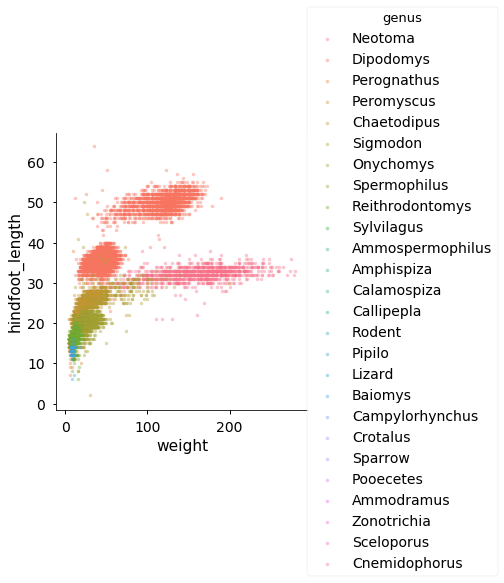

In [60]:
sns.lmplot(x='weight', y='hindfoot_length', hue='genus', data=surveys,
          fit_reg=False, scatter_kws={'s': 12, 'alpha':0.4})

The legend can be made more manageable, by controlling it manually.

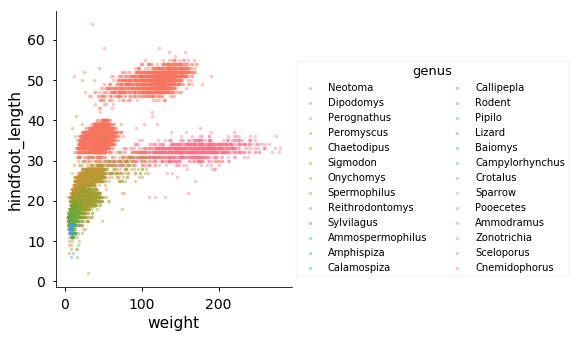

In [61]:
# g is the grid object reuturned from lmplot()
g = sns.lmplot(x='weight', y='hindfoot_length', hue='genus', data=surveys,
          fit_reg=False, scatter_kws={'s': 12, 'alpha':0.4}, legend=False)
g.add_legend(ncol=2, fontsize=10)

Now this looks good! There is a clear separation between different genus, but
also significant spread within genus, for example in the weight of the 
Neotoma observations. There are also two clearly separate clusters 
of Dipodomys. Maybe separating the observations into
different species would be better?

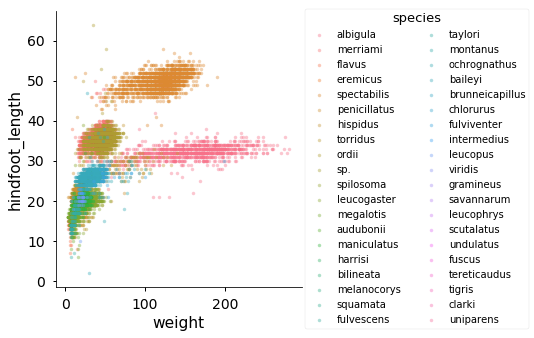

In [62]:
g = sns.lmplot(x='weight', y='hindfoot_length', hue='species', data=surveys,
          fit_reg=False, scatter_kws={'s': 12, 'alpha':0.4}, legend=False)
g.add_legend(ncol=2, fontsize=10)

Great! Together with the genus plot, this definitely seem to explain most of the
variance we see in the hindfoot length and weight measurements. It is still a
bit messy as it appears like we have around 5 clusters, but there are 21 species
in the legend. Let's only include a few of the most common species.

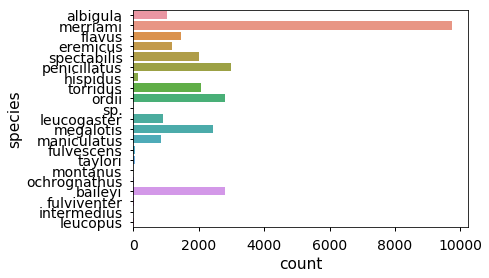

In [63]:
sns.countplot(y='species', data=surveys_hf_wt)

Around 1000 observations appears to be a reasonable cutoff, let's check that more precisely.

In [64]:
surveys_hf_wt.groupby('species').size().sort_values(ascending=False)

species
merriami        9739
penicillatus    2978
baileyi         2808
ordii           2793
megalotis       2429
torridus        2085
spectabilis     2026
flavus          1471
eremicus        1200
albigula        1046
leucogaster      907
maniculatus      838
hispidus         159
fulvescens        73
taylori           45
fulviventer       40
ochrognathus      40
leucopus          36
sp.                9
intermedius        8
montanus           8
dtype: int64

In [65]:
surveys_hf_wt.groupby('species').size()

species
albigula        1046
baileyi         2808
eremicus        1200
flavus          1471
fulvescens        73
fulviventer       40
hispidus         159
intermedius        8
leucogaster      907
leucopus          36
maniculatus      838
megalotis       2429
merriami        9739
montanus           8
ochrognathus      40
ordii           2793
penicillatus    2978
sp.                9
spectabilis     2026
taylori           45
torridus        2085
dtype: int64

There is a big drop from 838 to 159, let's include only those with more than 800
observations.

In [66]:
# Need lambda to do this in one chain,
# intermediate variables are more intuitive to explain
# (surveys_hf_wt
#      .groupby('species')
#      .size()
#      .loc[lambda x: x > 800]
#      .index
# )
species_count = surveys_hf_wt.groupby('species').size()
abundant_species = species_count.loc[species_count > 800].index
abundant_species

Index(['albigula', 'baileyi', 'eremicus', 'flavus', 'leucogaster',
       'maniculatus', 'megalotis', 'merriami', 'ordii', 'penicillatus',
       'spectabilis', 'torridus'],
      dtype='object', name='species')

In [67]:
surveys_abun_species = (surveys_hf_wt
                        .loc[surveys_hf_wt['species']
                        .isin(abundant_species)])
surveys_abun_species.nunique()

record_id          30320
month                 12
day                   31
year                  26
plot_id               24
species_id            12
sex                    2
hindfoot_length       55
weight               252
genus                  7
species               12
taxa                   1
plot_type              5
dtype: int64

Still has around 30,000 observations, so only 4,000 was removed, let's visualize this subset of the data.

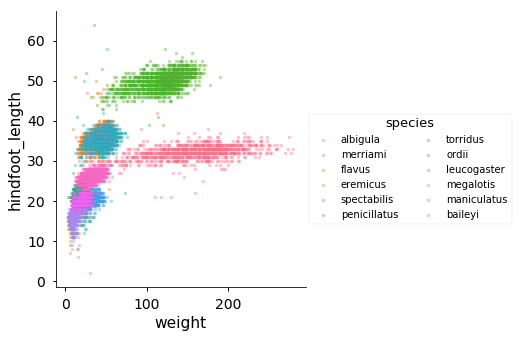

In [68]:
g = sns.lmplot(x='weight', y='hindfoot_length', hue='species',
               data=surveys_abun_species, fit_reg=False,
               scatter_kws={'s': 12, 'alpha':0.4}, legend=False)
g.add_legend(ncol=2, fontsize=10)

#### Challenge

Create a scatter plot of `hindfoot_length` over `species` with the `weight` showing in different colors.
Is there any problem with this plot? *Hint: think about how many observations there are*

```{r}
ggplot(surveys_abun_species, aes(x = weight, y = species, color = hindfoot_length)) +
    geom_point(size = 0.1, position = 'jitter')
```

## Split-apply-combine... plot!

In this section, we will learn how to work with `pandas` to create a summary dataframe and then plot it in seaborn and `seaborn`
together. We can create a powerful data exploration
workflow using these two packages.

Let's calculate number of counts per year for each species and sex. First we need to group the data and count records within each group:

In [69]:
surveys_abun_species.groupby(['year', 'species', 'sex']).size()

year  species       sex
1977  eremicus      M        2
      flavus        F       14
                    M        8
      leucogaster   F        1
      megalotis     F        1
                    M        1
      merriami      F       75
                    M      106
      ordii         F       10
                    M        2
      penicillatus  F        3
      spectabilis   F       18
                    M       11
1978  albigula      F       10
                    M       13
      eremicus      F        5
                    M        7
      flavus        F       16
                    M       17
      leucogaster   F       15
                    M       20
      maniculatus   F        1
                    M        1
      megalotis     F        1
                    M        1
      merriami      F      165
                    M      171
      ordii         F        5
                    M       16
      penicillatus  F       10
                          ... 
2001  megalotis

Looks good, create a data frame of the output, rename the new column and assign it to a new variable.

In [70]:
species_per_year = (
    surveys_abun_species
     .groupby(['year', 'species', 'sex'])
     .size()
     .reset_index()
     .rename(columns={0: 'count'})
)
species_per_year.head()

,year,species,sex,count
0,1977,eremicus,M,2
1,1977,flavus,F,14
2,1977,flavus,M,8
3,1977,leucogaster,F,1
4,1977,megalotis,F,1


Let's explore how the number of each genus varies over time. Longitudinal data
can be visualized as a line plot with years on the x axis and counts on the y
axis. Since there is not lineplot function in `seaborn` (coming soon), we will use the low level interface `FacetGrid()` with a the `matplotlib` function `plot()`. `FacetGrid()` is the foundation for both `factorplot()` and `lmplot()`, but can also be used directly. Any plotting function can be mapped onto the grid object created by `Facetgrid()`.

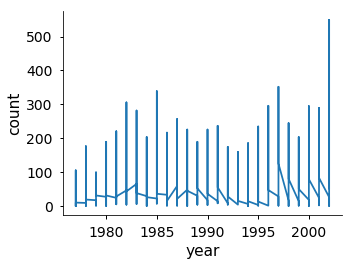

In [71]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(data=species_per_year, size=4, aspect=1.3)
g.map(plt.plot, 'year', 'count')

Unfortunately, this does not work because we plotted data for all the species
together. We need to tell `seaborn` to draw a line for each species by modifying
the hue parameter.

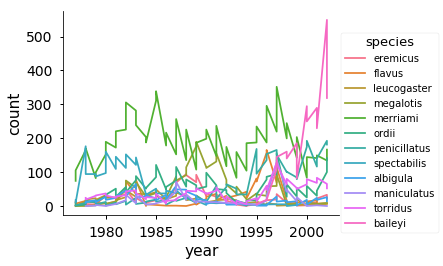

In [72]:
g = sns.FacetGrid(hue='species', data=species_per_year, size=4, aspect=1.3)
g.map(plt.plot, 'year', 'count')
g.add_legend(fontsize=10)

`FacetGrid()` can create map variables onto columns and rows just like `factorplot()` and `lmplot()`. Use this to make a time series plot for each species.

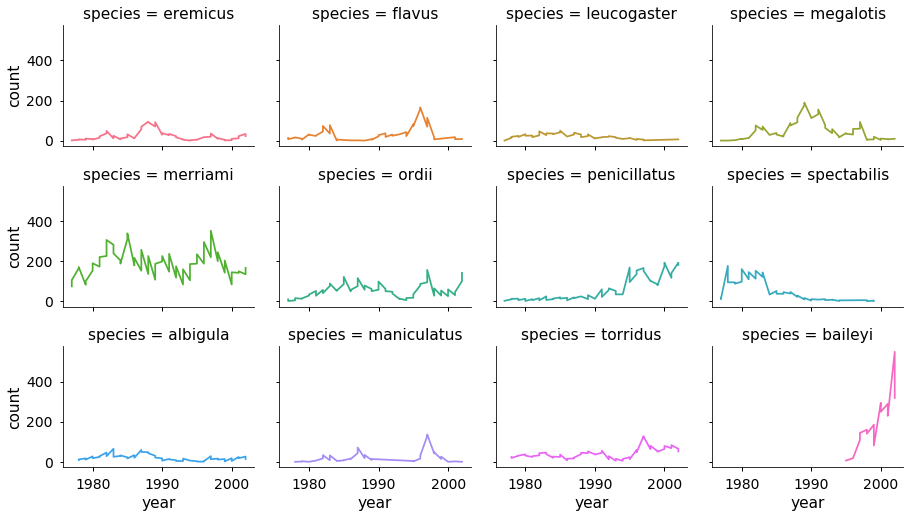

In [73]:
g = sns.FacetGrid(hue='species', data=species_per_year, size=2.5,
                 aspect=1.3, col='species', col_wrap=4)
g.map(plt.plot, 'year', 'count')

Let's add a legend and clean up some plot elements.

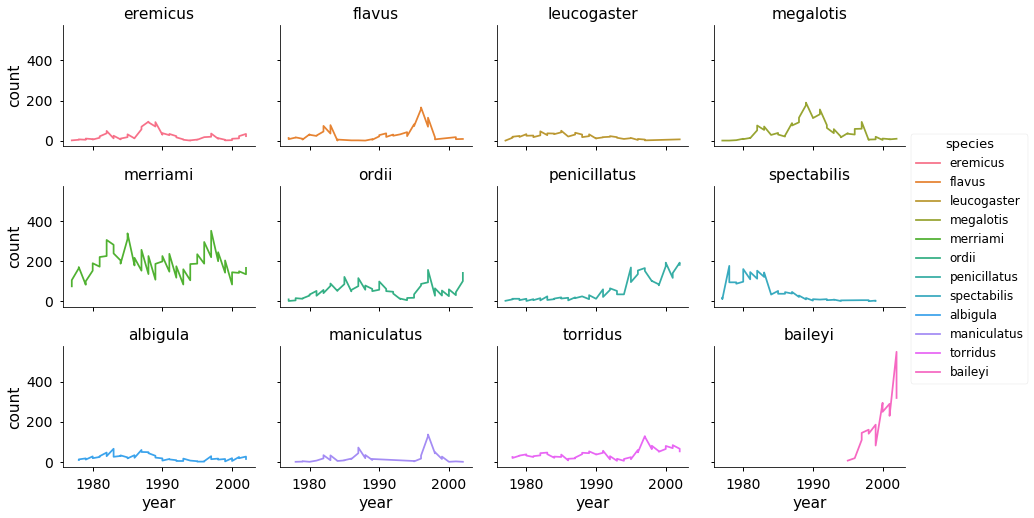

In [74]:
g = sns.FacetGrid(hue='species', data=species_per_year, size=2.5,
                 aspect=1.3, col='species', col_wrap=4)
g.map(plt.plot, 'year', 'count')
g.add_legend(fontsize=12)
g.set_titles('{col_name}')

Now split the line in each plot by the sex of each individual measured.

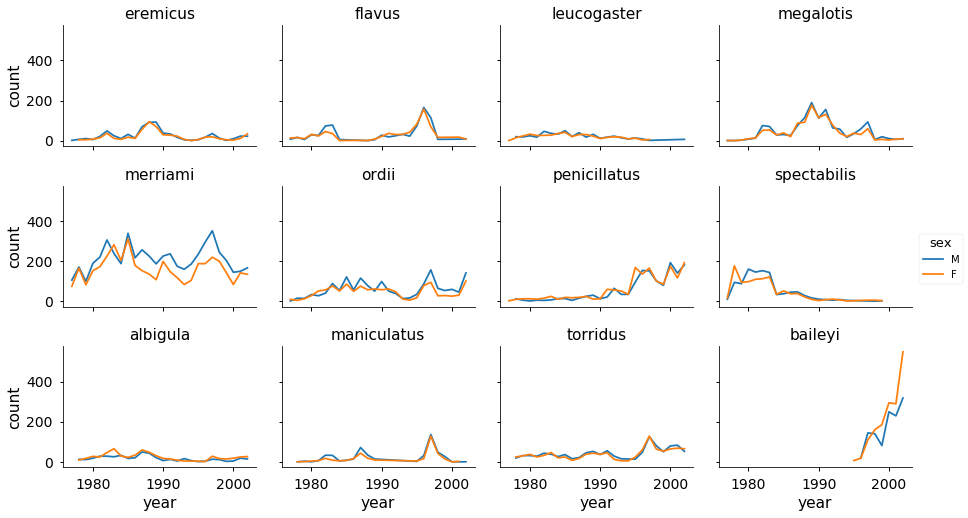

In [75]:
g = sns.FacetGrid(hue='sex', data=species_per_year, size=2.5,
                 aspect=1.3, col='species', col_wrap=4)
g.map(plt.plot, 'year', 'count')
g.add_legend(fontsize=10)
g.set_titles('{col_name}')

#### Challenge

Use the filtered data frame for all of these questions.

1. Remember the histogram colored according to each species? Starting from that
code, how could we separate each species into its own subplot?
2.
a. Which year was the average weight of the animals the highest?
b. Is the yearly trend the same for all species?



```{r}
# Answers
# 1
ggplot(yearly_counts, aes(x = n, fill = species)) +
    geom_histogram() +
    facet_wrap(~ species)
```

```{r}
# 2.a
surveys_abun_species %>%
    filter(!is.na(weight)) %>%
    group_by(year) %>%
    summarize(mean_weight = mean(weight)) %>%
    ggplot(aes(x = year, y = mean_weight)) +
        geom_line()
```

```{r}
# 2.b
surveys_abun_species %>%
    filter(!is.na(weight)) %>%
    group_by(year, species) %>%
    summarize(mean_weight = mean(weight)) %>%
    ggplot(aes(x = year, y = mean_weight, color = species)) +
        geom_line() +
        facet_wrap(~ species)
```

# =====================================================
# ======================== END ========================
# =====================================================


It is possible to specify exactly which colors to use, to avoid those that are
hard to distinguish. We can also change the thickness of the lines, and adjust
the x labels so that they don't overlap. This will be discussed in detail in the
data visualization lecture.

```{r}
color_names <- c('black', 'orange')

surveys_abun_species %>%
    filter(!is.na(sex)) %>%
    group_by(year, species, sex) %>%
    tally() %>%
    ggplot(aes(x = year, y = n, color = sex)) +
        geom_line(size = 1) +
        scale_color_manual(values = color_names) +
        facet_wrap(~ species) +
        theme_bw() +
        theme(text = element_text(size=12),
               axis.text.x = element_text(angle=30, hjust=1))
```



*Parts of this lesson material were taken and modified from [Data
Carpentry](http://datacarpentry.org) under their CC-BY copyright license. See
their [lesson page](http://www.datacarpentry.org/R-ecology-lesson/03-dplyr.html) for the original source.*

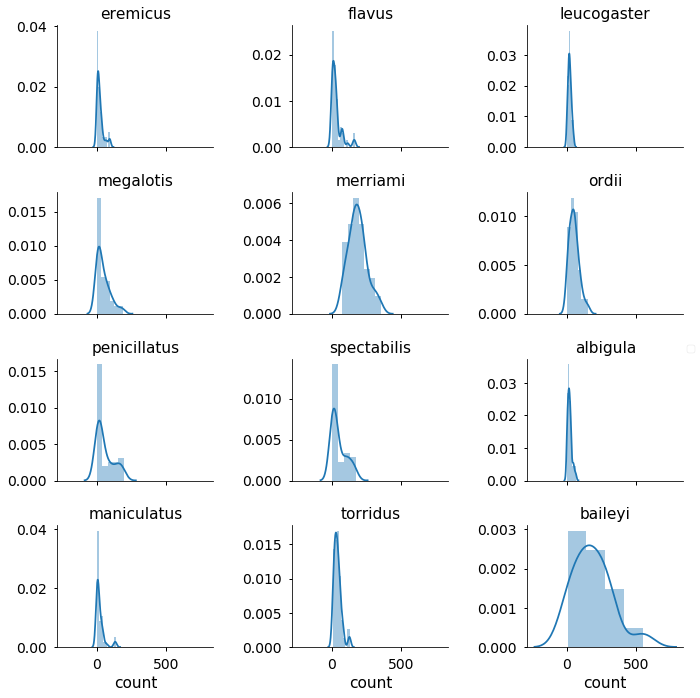

In [76]:
# TODO we should teach histograms, maybe the same spot as in the R lecture and just a little bit
g = sns.FacetGrid(data=species_per_year, size=2.5,
                 aspect=1.3, col='species', col_wrap=3, sharey=False)
g.map(sns.distplot, 'count')#, bins=20)
# g.map(plt.hist, 'count')#, bins=bins)
g.add_legend(fontsize=10)
g.set_titles('{col_name}')

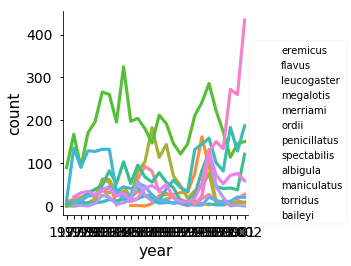

In [77]:
g = sns.factorplot(y='count', x='year', hue='species',
               data=species_per_year, ci=None, markers='', legend=False)
g.add_legend(fontsize=10)